# Titanic Survival Prediction

*   **Intoduction**
   *  The Titanic Survival Prediction project is a classic machine learning problem where we aim to predict weather the passenger survived the sinking of the Titanic based on various feature such as age,gender,ticket class & more....

*   **Content**
   * Data Exploration
   * Data Cleaning
   * Model testing
   * Model Evaluation
   * Final Prediction

*Importing Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

*Reading CSV OF TRAIN & TEST datasets*

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Checking Dtypes of Training Datasets*

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Totals Rows & Columns in Datasets

In [5]:
print("Total Rows in my  Training Datasets--->",train.shape[0])
print("Total Columns in my Training Datasets--->",train.shape[1])

Total Rows in my  Training Datasets---> 891
Total Columns in my Training Datasets---> 12


# Column Names and Definitions

**1)  PassengerId:**

Definition: Unique identifier for each passenger.
Use: Helps distinguish and identify individual passengers.

**2) Survived:**

Definition: Indicates whether a passenger survived or not.
Key: 0 = No, 1 = Yes

**3) Pclass:**

Definition: Represents the socio-economic status of the passenger.
Key: 1 = 1st Class (Upper), 2 = 2nd Class (Middle), 3 = 3rd Class (Lower)

**4) Name:**

Definition: Full name of the passenger.
Use: Provides the names of individuals on board.

**5) Sex:**

Definition: Specifies the gender of the passenger.
Key: Male or Female

**6) Age:**

Definition: Age of the passenger in years.
Additional Notes: Age is fractional if less than 1, and if estimated, it is in the form of xx.5.

**7) SibSp:**

Definition: Indicates the number of siblings or spouses the passenger had aboard.
Use: Family relations information.

**8) Parch:**

Definition: Specifies the number of parents or children the passenger had aboard.
Use: More family relations information.

**9) Ticket:**

Definition: The ticket number for the passenger.
Use: Ticket details.

**10) Fare:**

Definition: The amount of money the passenger paid for the ticket.
Use: Reflects the economic aspect of the journey.

**11) Cabin:**

Definition: The cabin number where the passenger stayed.
Use: Indicates the cabin location.

**12) Embarked:**

Definition: Port of Embarkation - where the passenger boarded the Titanic.
Key: C = Cherbourg, Q = Queenstown, S = Southampton

*Statitical Details of Training Datasets*

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 *  **Summary of Statistical Insights**

**Survived:**

Mean: Approximately 38% of passengers survived.


**Pclass:**

Mean: On average, passengers are in the 2nd class.
Min: The minimum class is 1st class.
Max: The maximum class is 3rd class.

**Age:**

Count: Age information is available for 714 passengers.
Mean: The average age is around 29.7 years.
Min: The youngest passenger is 0.42 years old.
Max: The oldest passenger is 80 years old.
Distribution: Varies with some younger passengers and a 4ew elderly ones.

**SibSp (Siblings/Spouses Aboard):**

Mean: On average, passengers have about 0.52 siblings/spouses aboard.
Max: Some passengers have up t5 8 siblings/spouses.

**Parch (Parents/Children Aboard):**

Mean: On average, passengers have about 0.38 parents/children aboard.
Max: Some passengers have 6p to 6 parents/children.

**Fare:**

Mean: The average fare is approximately 32.20.
Min: The minimum fare is 0 (possibly indicating missing or free tickets).
Max: The maximum fare is 512.33.

*Checking Null Values*

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

*Visualize the missing value*

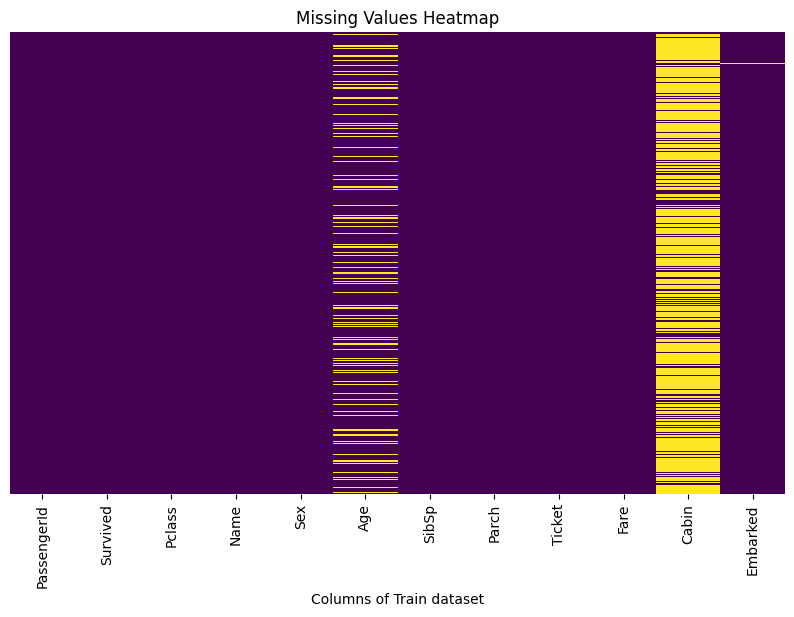

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.xlabel("Columns of Train dataset")
plt.show()

*Handling the missing value*

In [9]:
#Handling the missing value of Age columns
train['Age'].fillna(train['Age'].median(),inplace = True)

#Handling the missing column of Cabin
train.drop('Cabin',axis=1,inplace=True)

#Handling the missing value of Embarked
train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

In [10]:
print("Missing Values after Handling:\n", train.isna().sum())

Missing Values after Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


*Data Visualization*

*Visualize the survival rate*

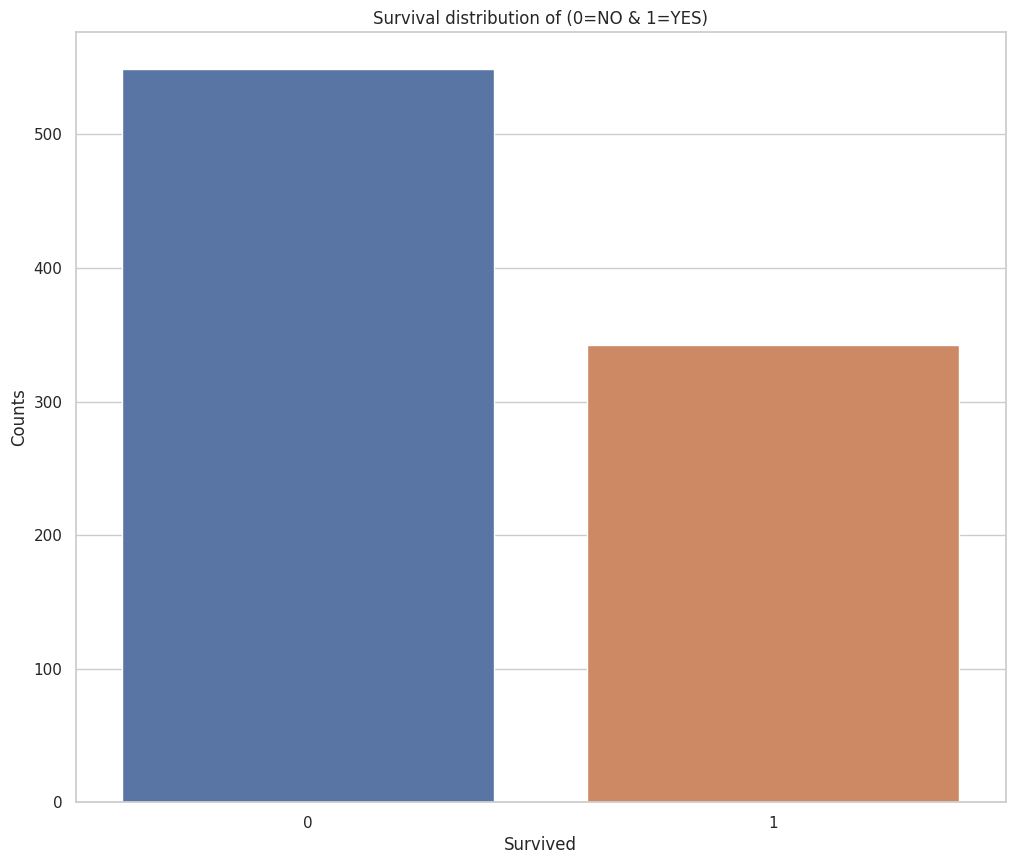

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
sns.countplot(x='Survived',data=train)
plt.title("Survival distribution of (0=NO & 1=YES)")
plt.xlabel("Survived")
plt.ylabel("Counts")
plt.show()

*Visualize the Survival rate by the Age*

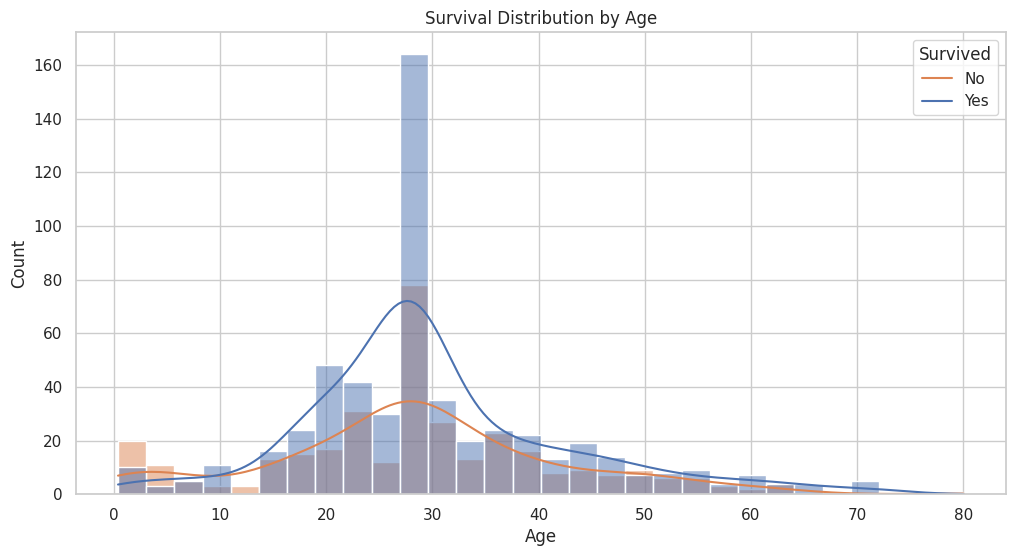

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(x='Age', hue='Survived', data=train, kde=True) #using Kernel Density Estimation
plt.title('Survival Distribution by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

*Visualize the Survival rate by Gender*

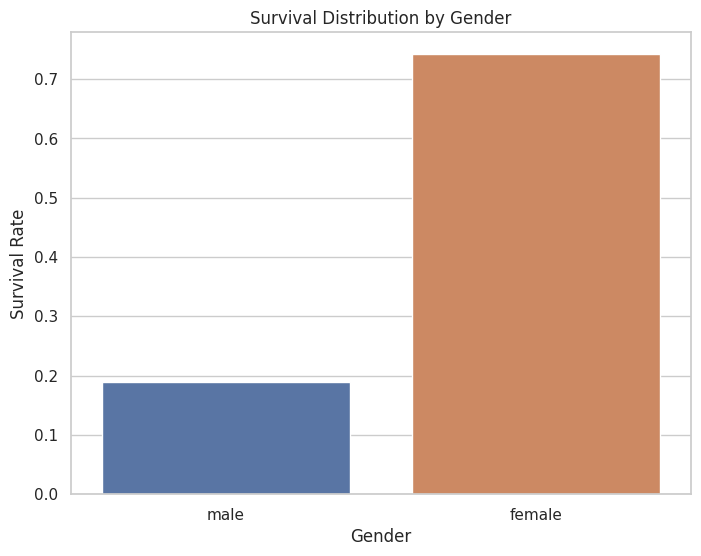

In [13]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train, ci=None)
plt.title('Survival Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

*Survival Distribution by Siblings/Spouses Aboard'*

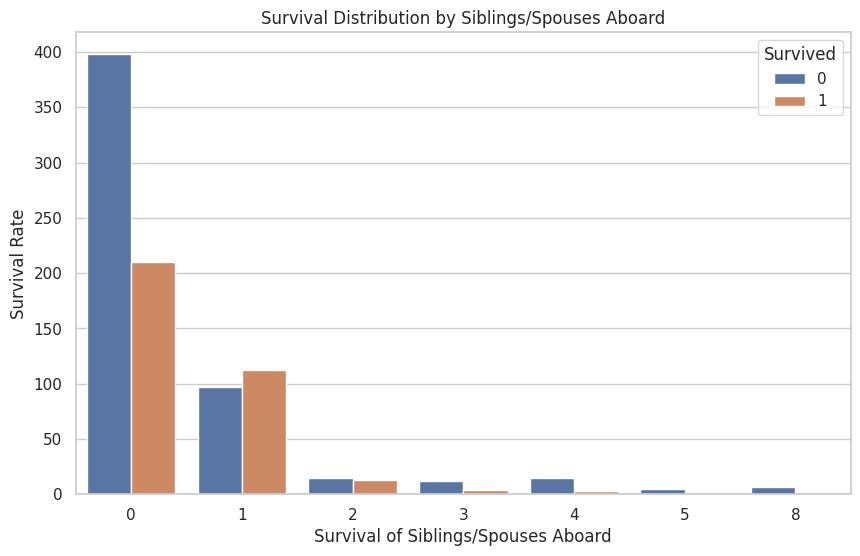

In [14]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='SibSp', hue='Survived', data=train)
plt.title('Survival Distribution by Siblings/Spouses Aboard')
plt.xlabel('Survival of Siblings/Spouses Aboard')
plt.ylabel('Survival Rate')
plt.show()

*Explore Demographic Characteristics*

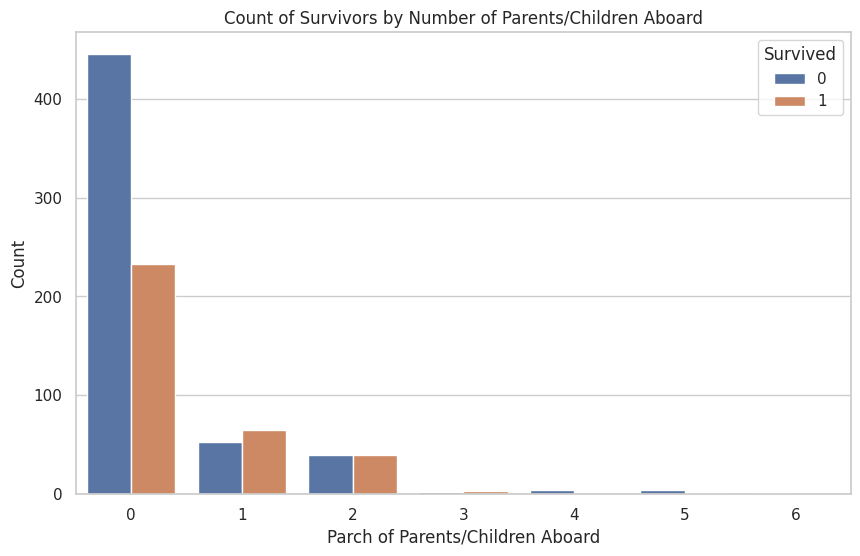

In [15]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='Parch', hue='Survived', data=train)
plt.title('Count of Survivors by Number of Parents/Children Aboard')
plt.xlabel('Parch of Parents/Children Aboard')
plt.ylabel('Count')
plt.show()

*Visualize survival rate by passenger class*

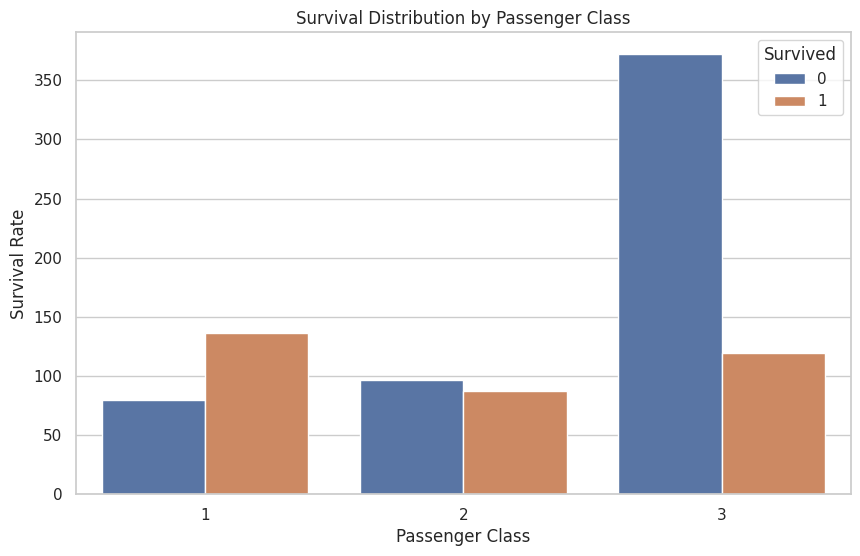

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

*Visualize survival rate (proportion) by passenger class*

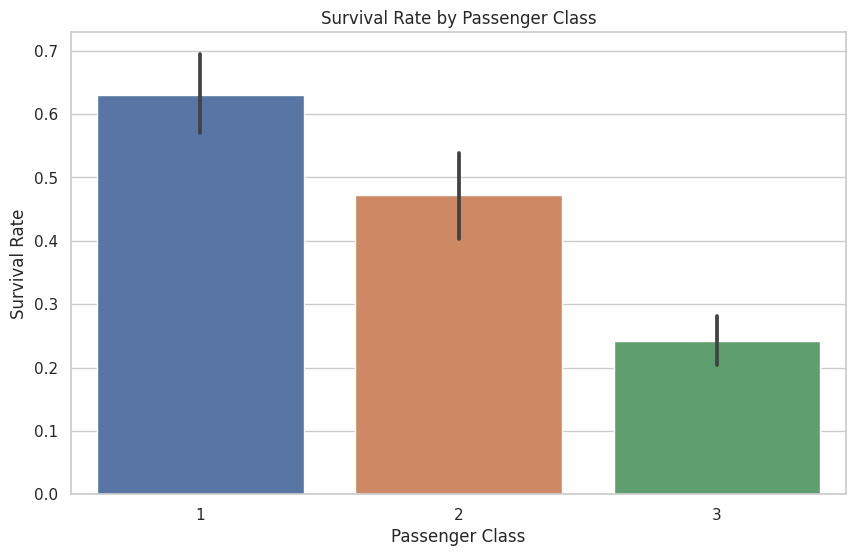

In [17]:
train['Survived'] = train['Survived'].astype(int)

sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

*Calculate average fare for survivors and non-survivors*

In [18]:
average=train.groupby('Survived')['Fare'].mean()

print("Average Fare for Non-Survivors--->", average[0])
print("Average Fare for Survivors--->", average[1])

Average Fare for Non-Survivors---> 22.117886885245902
Average Fare for Survivors---> 48.39540760233918


*Create a cross-tabulation of Embarked and Survived*

In [19]:
embarked_survival = pd.crosstab(train['Embarked'], train['Survived'], margins=True, margins_name='Total')
print(embarked_survival)

Survived    0    1  Total
Embarked                 
C          75   93    168
Q          47   30     77
S         427  219    646
Total     549  342    891


*  Observation
   *  Embarked:
   
     1) The port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton). Survived: A binary variable indicating whether a passenger survived (1) or not (0).

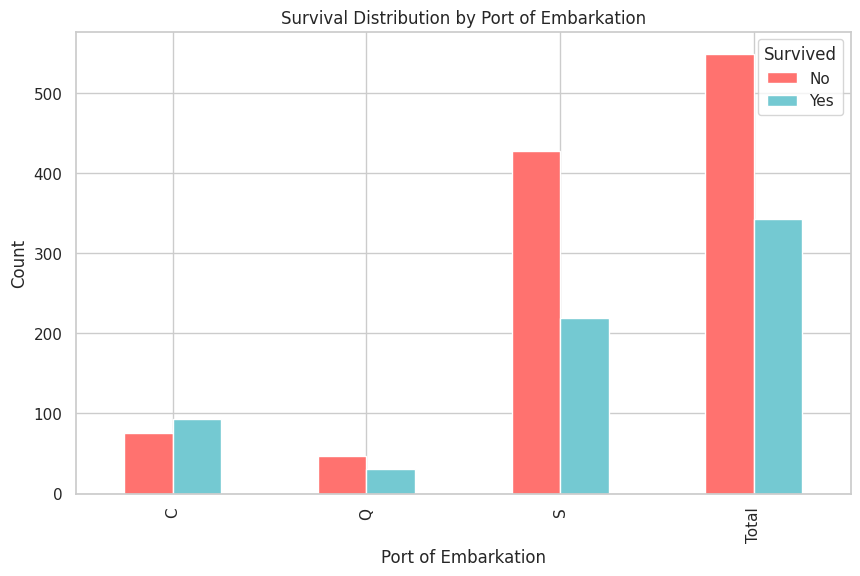

In [20]:
embarked_survival.drop('Total', axis=1, inplace=True)
embarked_survival.plot(kind='bar', color=['#FF726F', '#74C9D2'], figsize=(10, 6))
plt.title('Survival Distribution by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

*Model Evaluation*

In [21]:
train = train.drop(['Name','PassengerId','Ticket'], axis=1)

*Perform one-hot encoding on categorical columns*

In [ ]:
train = pd.get_dummies(train, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)

In [23]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data
train[numerical_cols] = scaler.fit_transform(train[numerical_cols])

In [24]:
# Split the data into features (X) and target (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

*Importing the models from sklearn*

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [26]:
param_grid = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'gamma': [0.01, 0.1, 1],
        'kernel': ['linear', 'rbf']
    }
}

# Hyperparameters Tuning:

**Random Forest:**
n_estimators: The number of trees in the forest.
max_depth: The maximum depth of the tree.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.

**Gradient Boosting:**
n_estimators: The number of boosting stages to be run.
learning_rate: The step size shrinkage to prevent overfitting. Lower values make the algorithm more robust.
max_depth: The maximum depth of the individual trees.
min_samples_split: The minimum number of samples required to split an internal node.
min_samples_leaf: The minimum number of samples required to be at a leaf node.

**Support Vector Machine (SVM):**
C: Regularization parameter. The strength of the regularization is inversely proportional to C.
gamma: Kernel coefficient for 'rbf' and 'poly'. Higher values lead to more complex decision boundaries.
kernel: Specifies the kernel type to be used in the algorithm. 'linear' is a linear kernel, and 'rbf' is a radial basis function kernel.





*  *Adjusting these hyperparameters allows us to fine-tune the performance of the machine learning models. Grid search involves exploring all possible combinations of these hyperparameter values within the specified ranges to find the combination that produces the best results.*

In [27]:
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svm = SVC()

In [28]:
grid_rf = GridSearchCV(rf, param_grid['RandomForest'], cv=5)
grid_rf.fit(X_train, y_train)

grid_gb = GridSearchCV(gb, param_grid['GradientBoosting'], cv=5)
grid_gb.fit(X_train, y_train)

grid_svm = GridSearchCV(svm, param_grid['SVM'], cv=5)
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [29]:
print("Random Forest - Best parameters:", grid_rf.best_params_)
print("Random Forest - Best accuracy:", grid_rf.best_score_)

print("Gradient Boosting - Best parameters:", grid_gb.best_params_)
print("Gradient Boosting - Best accuracy:", grid_gb.best_score_)

print("SVM - Best parameters:", grid_svm.best_params_)
print("SVM - Best accuracy:", grid_svm.best_score_)

Random Forest - Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest - Best accuracy: 0.832867132867133
Gradient Boosting - Best parameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Gradient Boosting - Best accuracy: 0.8272530286614794
SVM - Best parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
SVM - Best accuracy: 0.8174135723431497


In [30]:
best_rf_model = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42  # You can set a random seed for reproducibility
)

In [31]:
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [32]:
y_pred = best_rf_model.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8491620111731844


In [35]:
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)
# 2. Cabin: Drop the column
test.drop('Cabin', axis=1, inplace=True)

# 3. Embarked: Fill missing values with the most common value
most_common_embarked_test = test['Embarked'].mode()[0]
test['Embarked'].fillna(most_common_embarked_test, inplace=True)
test = test.drop(['Name','PassengerId', 'Ticket'], axis=1)
test = pd.get_dummies(test, columns=['Pclass', 'Sex', 'Embarked'], drop_first=True)
test[numerical_cols] = scaler.fit_transform(test[numerical_cols])

In [36]:
new_prediciton = best_rf_model.predict(test)

*Feature Enginerring*

In [39]:
test['Survived_prediciton'] = new_prediciton
print(test)

          Age  SibSp     Parch      Fare  Pclass_2  Pclass_3  Sex_male  \
0    0.452723  0.000  0.000000  0.015282         0         1         1   
1    0.617566  0.125  0.000000  0.013663         0         1         0   
2    0.815377  0.000  0.000000  0.018909         1         0         1   
3    0.353818  0.000  0.000000  0.016908         0         1         1   
4    0.287881  0.125  0.111111  0.023984         0         1         0   
..        ...    ...       ...       ...       ...       ...       ...   
413  0.353818  0.000  0.000000  0.015713         0         1         1   
414  0.512066  0.000  0.000000  0.212559         0         0         0   
415  0.505473  0.000  0.000000  0.014151         0         1         1   
416  0.353818  0.000  0.000000  0.015713         0         1         1   
417  0.353818  0.125  0.111111  0.043640         0         1         1   

     Embarked_Q  Embarked_S  Survived_prediciton  
0             1           0                    0  
1        

In [40]:
test[test['Survived_prediciton'] == 1]

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Survived_prediciton
6,0.393380,0.000,0.000000,0.014891,0,1,0,1,0,1
8,0.235131,0.000,0.000000,0.014110,0,1,0,0,0,1
12,0.301068,0.125,0.000000,0.160574,0,0,0,0,1,1
14,0.617566,0.125,0.000000,0.119406,0,0,0,0,1,1
15,0.314256,0.125,0.000000,0.054107,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
408,0.353818,0.000,0.000000,0.015070,0,1,0,1,0,1
409,0.037320,0.125,0.111111,0.026887,0,1,0,0,1,1
410,0.353818,0.000,0.000000,0.015127,0,1,0,1,0,1
411,0.485692,0.125,0.000000,0.175668,0,0,0,1,0,1


# Thank you!!😊😊